# 14,000 Bees

> [Jump directly to questions and answers, below](#querying)

<br><br><br><br>


In [1]:
# import data and examine size

import pandas as pd
pd.set_option('display.max_columns', 50)
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

file = '/Users/aidanair/Documents/DATA/ALL_DATASETS/bees_0610.csv'
df = pd.read_csv(file, sep = ';')

print(df.shape)

(14699, 30)


> The dataset has over 14,000 rows and 30 columns.

In [2]:
df.head(3)

,ID,ROOT_ID,STATE,FEATURED,CHECKED,VALIDATION_SCORE,LATITUDE,LONGITUDE,CREATED_AT,MODIFIED_AT,USER_ID,IMAGE,BEE_VISITING,CATEGORY,OTHER_PLANT,BEE_TYPE,OTHER_BEE_TYPE,SETTING,OTHER_SETTING,CLIMBER_TYPE,OTHER_CLIMBER,SHRUB_TYPE,OTHER_SHRUB,TREE_TYPE,OTHER_TREE,WEATHER,OTHER_WEATHER,EMOTION,DESCRIPTION,SPOTTED_AT
0,693207,693207,enabled,0,0,0,-37.785884,175.256464,2022-10-04 00:32,NaN,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden centre,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,Happy,NaN,2022-10-04 11:30
1,693206,693206,enabled,0,0,0,-37.785884,175.256464,2022-10-04 00:27,NaN,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden Centre,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,2022-10-04 11:26
2,693205,693205,enabled,0,0,0,-37.785884,175.256464,2022-10-04 00:25,NaN,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden Center,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,Happy,There were alot of bees working around the lav...,2022-10-04 11:15




> CLEANING: remove some columns that hold no data, change data type, make column headers lowercase

In [3]:
# lowercase the column headings

df_cols2 = []
for x in df.columns:
    term = x.lower()
    df_cols2.append(term)
    
df.columns = df_cols2

In [4]:
# checking each col to see there are actually values in it, and if so that there is more than one

# validation_score has only 0 values
# climber_type has no values
# other_climber has no values
# shrub_type has no values
# other_shrub has no values
# tree_type has no values
# other_tree has no values

df.climber_type.value_counts()

Series([], Name: climber_type, dtype: int64)

In [5]:
# drop the cols with no values

df2 = df[['state', 'featured', 'checked',
       'latitude', 'longitude', 'created_at', 'modified_at', 'user_id',
       'image', 'bee_visiting', 'category', 'other_plant', 'bee_type',
       'other_bee_type', 'setting', 'other_setting', 
       'weather', 'other_weather', 'emotion', 'description', 'spotted_at']]

In [6]:
# cast three string cols to datetime

df2['created_at'] = df2['created_at'].astype('datetime64[ns]')
df2['modified_at'] = df2['modified_at'].astype('datetime64[ns]')
df2['spotted_at'] = df2['spotted_at'].astype('datetime64[ns]')

<a id='querying'></a>
<br><br><br><br>


> QUERYING: below we ask the following questions

> 

> 

> What period does the data cover? **April 15, 2020 to Oct 4, 2022**

> What are the frequency rankings for bee types observed? **Honey bee on top at 3,000+, Leaf-cutter bee rarest at 68 (see below for others)**

> What do they visit? **Flowers overwhelmingly, but shrubs, trees and climbers also noted**

> What's the Honeybee count over the three years? (Note: 2020 and 2022 are partial years) **1,419 (2020), 1,207(2021), 670 (2022)**

> What's the bumblebee count (all 6 types considered) over the three years? **3,239 (2020), 1,864(2021), 865 (2022)**

> In a full year (2021) how are the recorded bumblebees distributed by month? **Over two thirds fall in June, July and August** Chart below.

> In a full year (2021) how are the recorded bumblebees distributed by week? **Week 23 has a surge to almost twice the next nearest week, with over 200 sightings** Chart below.

> Where does the data come from, geographically?
**The data extends from the level of New Zealand in the south to the level of Norway in the north and from Alaksa in the west to New Zealand in the east**

> Assuming Wales to be a crude rectangle, how many observations in Wales? **About 1,300**

> If we draw a rectangle around Cardiff using Taffs Well in the north-west and a point in the sea in the south-east, how many observations are in Cardiff? **536**

> How many bees noted in Cardiff, by year? **393, 85, 58**

> How many bumblebees noted in Cardiff over the three years? **174, 48 and 38**

In [7]:
# what period does the data cover?

df2.sort_values('created_at', ascending = False).head(3)

# earliest entry is April 15, 2020
# latest entry is Oct 4, 2022

# note - the spotted at variable has date problems. 2012 dates for 'spotted at' that are 2021 dates in reality it seems


,state,featured,checked,latitude,longitude,created_at,modified_at,user_id,image,bee_visiting,category,other_plant,bee_type,other_bee_type,setting,other_setting,weather,other_weather,emotion,description,spotted_at
0,enabled,0,0,-37.785884,175.256464,2022-10-04 00:32:00,NaT,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden centre,Sunny,NaN,Happy,NaN,2022-10-04 11:30:00
1,enabled,0,0,-37.785884,175.256464,2022-10-04 00:27:00,NaT,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden Centre,Sunny,NaN,NaN,NaN,2022-10-04 11:26:00
2,enabled,0,0,-37.785884,175.256464,2022-10-04 00:25:00,NaT,62671,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,Lavender,Honey bee,NaN,other,Garden Center,Sunny,NaN,Happy,There were alot of bees working around the lav...,2022-10-04 11:15:00


In [8]:
# rankings for bee type

df2.bee_type.value_counts()

Honey bee                 3296
other bee                 3175
White tailed bumblebee    2533
Common carder bee         2091
Buff tailed bumblebee     1501
Red tailed bumblebee       887
Small garden bumblebee     849
Red mason bee              101
Heath bumblebee            101
Early mining bumblebee      97
Leaf-cutter bee             68
Name: bee_type, dtype: int64

In [9]:
# rankings for bee visiting

df2.bee_visiting.value_counts()

a flower     10470
a shrub       3361
a tree         530
a climber      338
Name: bee_visiting, dtype: int64

<br><br><br>

> TIME

In [10]:
# filter for just 'Honey bee'
hb = df2[df2.bee_type == 'Honey bee']

# count by year
hb.groupby(hb.created_at.dt.year)['bee_type'].count()

created_at
2020    1419
2021    1207
2022     670
Name: bee_type, dtype: int64

In [11]:
bb = ['White tailed bumblebee', 'Buff tailed bumblebee', 'Red tailed bumblebee', 'Small garden bumblebee',
      'Heath bumblebee', 'Early mining bumblebee']

# how many observations for the bumblebees in the list?
print(len(df2[df2.bee_type.isin(bb) == True]))

# create df just for bumblebees
bbo = df2[df2.bee_type.isin(bb) == True]

5968


In [12]:
# what's the count of bumblebees by year?

bbo.groupby(bbo.created_at.dt.year)['bee_type'].count()

created_at
2020    3239
2021    1864
2022     865
Name: bee_type, dtype: int64

created_at
1       3
2      22
3      82
4     172
5     184
6     611
7     395
8     303
9      61
10     18
11      8
12      5
Name: bee_type, dtype: int64


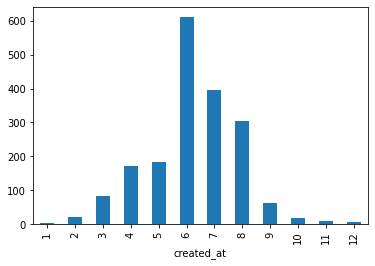

In [13]:
# Taking just 2021, what's the distribution over months for bumblebee sightings?

print(bbo[bbo.created_at.dt.year == 2021].groupby(bbo.created_at.dt.month)['bee_type'].count())

bbo[bbo.created_at.dt.year == 2021].groupby(bbo.created_at.dt.month)['bee_type'].count().plot(kind = 'bar');


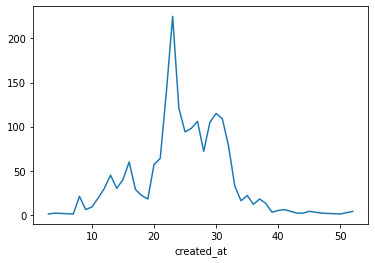

In [14]:
# Taking just 2021, what's the distribution over weeks for bumblebee sightings?

bbo[bbo.created_at.dt.year == 2021].groupby(bbo.created_at.dt.week)['bee_type'].count().plot();


<br><br><br>

> PLACE

In [15]:
# where are we, in terms of this dataset?

df2.sort_values('latitude', ascending = False)[:3]

# latitude from -39 (for example, the latitude of NZ North Island) to 60 (for example, Shetland, Norway), 
# longitude from -159 (for example, the longitude of Alaska) to 178 (for example, NZ)

,state,featured,checked,latitude,longitude,created_at,modified_at,user_id,image,bee_visiting,category,other_plant,bee_type,other_bee_type,setting,other_setting,weather,other_weather,emotion,description,spotted_at
14329,enabled,0,0,60.436124,-26.324983,2020-05-13 20:40:00,2020-05-19 14:20:00,28616,https://files.spotteron.com/images/spots/00003...,a flower,Other plant,"Paradise Apple Tree (maybe, more research has ...",Honey bee,NaN,Small Garden,NaN,Sunny,NaN,Happy,The bee was going from flower to flower on the...,2020-05-13 15:24:00
6159,enabled,0,1,58.178607,-7.053597,2021-05-30 08:13:00,2021-06-03 11:08:00,49360,https://files.spotteron.com/images/spots/00003...,a flower,Bluebell,NaN,other bee,Tree bumblebee,Small Garden,NaN,Sunny,NaN,Happy,NaN,2021-05-30 09:08:00
13846,enabled,0,0,58.046897,11.600560,2020-05-22 12:22:00,NaT,28844,https://files.spotteron.com/images/spots/00003...,a climber,Other plant,Other plant,other bee,Other,Large Garden,NaN,Sunny,NaN,Happy,A bee house in our shed at the summerhouse. A ...,2020-05-22 14:16:00


In [16]:
# limit to a crude rectangle that is Wales 

# nw corner
north_limit = 53.482882025806845
west_limit = -5.46771131838074
# se corner
south_limit = 51.37206027857178
east_limit = -2.985224612199138

wales = df2[(df2["latitude"] > south_limit) & (df2["latitude"] < north_limit) & (df2["longitude"] > west_limit) & (df2["longitude"] < east_limit)]
print(len(wales))


1372


In [17]:
# limit to a crude rectangle that is Cardiff using a NW and a SE corner

# Taffs Well as the western limit
west_border = -3.272094191771097
# Taffs Well as the northern limit
north_border = 51.544947114627696

# sea point as eastern limit
east_border = -3.093220992892372
# sea point as southern limit
south_border = 51.447283364739825

cdf = df2[(df2["latitude"] > south_border) & (df2["latitude"] < north_border) & (df2["longitude"] > west_border) & (df2["longitude"] < east_border)]
print(len(cdf))


536


In [18]:
# how many observations in 'Cardiff' by year?

cdf.groupby(cdf.created_at.dt.year)['bee_type'].count()


created_at
2020    393
2021     85
2022     58
Name: bee_type, dtype: int64

In [19]:
# limit the earlier Bumblebee df to the 'Cardiff' rectangle - how many in all?

cdf_bb = bbo[(bbo["latitude"] > south_border) & (bbo["latitude"] < north_border) & (bbo["longitude"] > west_border) & (bbo["longitude"] < east_border)]
print(len(cdf_bb))

260


In [20]:
# how many observations in 'Cardiff' by year for all bumblebees?

cdf_bb.groupby(cdf_bb.created_at.dt.year)['bee_type'].count()


created_at
2020    174
2021     48
2022     38
Name: bee_type, dtype: int64

<br><br><br>